# Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import io
import string

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Download Dataset

* https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8

In [2]:
URL = 'https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8'
file_path = tf.keras.utils.get_file('song_data.csv', URL)
print(file_path)

69820416/Unknown - 1s 0us/step/root/.keras/datasets/song_data.csv


In [3]:
dataset = pd.read_csv(file_path, dtype=str)[:250]
dataset

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
245,Air Supply,Believer,/a/air+supply/believer_20522284.html,Believer \nI got no where to go \nBeliever ...
246,Air Supply,Big Cat,/a/air+supply/big+cat_20522283.html,Big cat walking on the wild side \nBig cat ta...
247,Air Supply,Black And Blue,/a/air+supply/black+and+blue_20154341.html,"Blue, blue is the color of skies \nBlue is th..."
248,Air Supply,Body Glove,/a/air+supply/body+glove_20522282.html,"The more you win, the more you gain \nAn open..."


# Preprocess Dataset

In [4]:
def create_lyrics_corpus(dataset, field):
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  dataset[field] = dataset[field].str.lower()

  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')

  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  corpus = [l for l in corpus if l != '']

  return corpus

In [5]:
def tokenize_corpus(corpus, num_words=-1):
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()

  tokenizer.fit_on_texts(corpus)
  return tokenizer

In [6]:
# Create the corpus using the text 'column'
corpus = create_lyrics_corpus(dataset, 'text')

In [7]:
len(corpus), type(corpus)

(9556, list)

In [8]:
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus, num_words=2000)

In [9]:
tokenizer

In [10]:
total_words = len(tokenizer.word_index) + 1
print(total_words)

4148


In [11]:
tmp_seq = corpus[0]
print(tmp_seq)

tmp_seq = tokenizer.texts_to_sequences([tmp_seq])
print(tmp_seq)

look at her face its a wonderful face
[[111, 66, 86, 206, 29, 4, 1196, 206]]


# Create Sequences

In [12]:
sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(len(token_list)):
    n_gram_seq = token_list[:i+1]
    sequences.append(n_gram_seq)

sequences[0:10]

[[111],
 [111, 66],
 [111, 66, 86],
 [111, 66, 86, 206],
 [111, 66, 86, 206, 29],
 [111, 66, 86, 206, 29, 4],
 [111, 66, 86, 206, 29, 4, 1196],
 [111, 66, 86, 206, 29, 4, 1196, 206],
 [5],
 [5, 8]]

In [13]:
max_seq_len = max([len(seq) for seq in sequences])
print(max_seq_len)

sequences = np.array(pad_sequences(sequences,
                                   maxlen=max_seq_len,
                                   padding='pre'))

sequences[0:10]

20


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  111],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  111,   66],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  111,   66,   86],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  111,   66,   86,  206],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  111,   66,   86,  206,   29],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  111,   66,   86,  206,   29,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  111,   66,   86,  206,   29,    4, 1196],
       [   0,    0,    0,    0,    0,    

# Split Sequences into input sequence and output predicted word

In [14]:
len(sequences)

56846

In [15]:
input_sequences, labels = sequences[:, :-1], sequences[:,-1]
input_sequences[0], labels[0]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int32), 111)

In [16]:
len(input_sequences), len(labels)

(56846, 56846)

# One Hot Encode Lables

In [17]:
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)
one_hot_labels[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

# Check Data

In [18]:
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])

print(input_sequences[5])
print(input_sequences[6])

print(one_hot_labels[5])
print(one_hot_labels[6])

31
158
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0 111  66  86 206
  29]
[  0   0   0   0   0   0   0   0   0   0   0   0   0 111  66  86 206  29
   4]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [19]:
len(input_sequences), len(one_hot_labels)

(56846, 56846)

# Train a Text Generation Model

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=total_words,
                                    output_dim=64,
                                    input_length=max_seq_len-1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
model.add(tf.keras.layers.Dense(units=total_words,
                                activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 19, 64)            265472    
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 4148)              170068    
Total params: 449,140
Trainable params: 449,140
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(x=input_sequences,
                    y=one_hot_labels,
                    epochs=100)

Epoch 1/100
1777/1777 [==============================] - 34s 15ms/step - loss: 6.0363 - accuracy: 0.0425
Epoch 2/100
1777/1777 [==============================] - 26s 15ms/step - loss: 5.7126 - accuracy: 0.0552
Epoch 3/100
1777/1777 [==============================] - 26s 15ms/step - loss: 5.4816 - accuracy: 0.0746
Epoch 4/100
1777/1777 [==============================] - 26s 15ms/step - loss: 5.2999 - accuracy: 0.0981
Epoch 5/100
1777/1777 [==============================] - 26s 14ms/step - loss: 5.1568 - accuracy: 0.1117
Epoch 6/100
1777/1777 [==============================] - 26s 15ms/step - loss: 5.0318 - accuracy: 0.1241
Epoch 7/100
1777/1777 [==============================] - 26s 15ms/step - loss: 4.9246 - accuracy: 0.1323
Epoch 8/100
1777/1777 [==============================] - 26s 15ms/step - loss: 4.8313 - accuracy: 0.1387
Epoch 9/100
1777/1777 [==============================] - 26s 15ms/step - loss: 4.7477 - accuracy: 0.1464
Epoch 10/100
1777/1777 [==============================]

In [22]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  # plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  # plt.legend([string, 'val_'+string])
  plt.show()

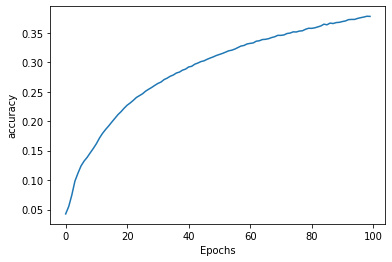

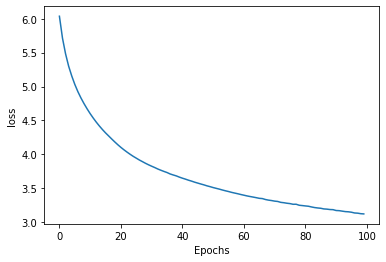

In [23]:
plot_graph(history, 'accuracy')
plot_graph(history, 'loss')

# Generate New Lyrics

In [24]:
seed_text = 'im feeling chills'
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences(sequences=[token_list],
                             maxlen=max_seq_len-1,
                             padding='pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)

  output_word = ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word

print(seed_text)


im feeling chills me to the farm that trick now im a cry is a shame falling going ahead ahead ballerina heels o day can trial near me and youll plans yourself together kissing through angels own dreadful winner corner defeated escape beaten fool love taught taught happiest shadow by myself for loneliness on loneliness that she will higher honesty your trees endless door shadow then devil girlya tidy ahhah honey day fools love can love taught everythings love taught everythings push scares forty hes doesnt may take take a lot of get excite let it be fair trees dreadful winner twilight present


# Randomly choose words with probabilities

In [25]:
seed_text = 'im feeling chills'
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences(sequences=[token_list],
                             maxlen=max_seq_len-1,
                             padding='pre')
  predicted_probs = model.predict(token_list)[0]
  predicted = np.random.choice([x for x in range(len(predicted_probs))],
                               p=predicted_probs)

  output_word = ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word

print(seed_text)

im feeling chills me to the rest of the head laughing stop doing now nobodys soul all alone can hug hug myself defenses along honesty no safe or call to die for door too easily heads for hills tambourine man man days higher old grind honey by forty winner rushing door girlfriend trees winner bird marionette brother marionette brother sunrise speaking move looks breaking not sail those bus day old man needed nancy baby tea mama tried spring still magic other thrill treasure thrill treasure train twilight tells tambourine ahhaa by piper kick baby guy love call my happiest day by loneliness fair
